# Running excercise on real Quantum Hardware:

## 1.1 Problem statement:

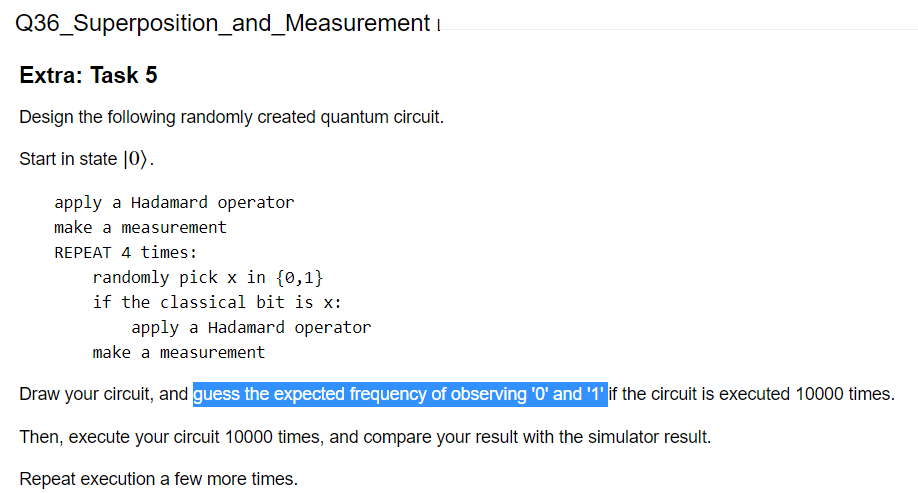

## 1.2 Prepare our circuit: 

In [17]:
# All imports: 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np 
import keyring

from qiskit import IBMQ



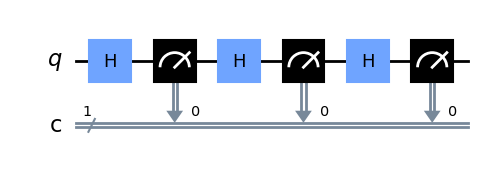

In [2]:

q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.measure(q[0],c[0])

shot_outcome = 0

for i in range (4):
    
    job = execute(experiments=qc, backend=Aer.get_backend("statevector_simulator"), shots=1)
    counts = job.result().get_counts()
    for key in counts:
        shot_outcome = int(key)
    
    x = int(np.random.randint(low=0, high=2, size=1)[0])
    
    #print("x = ",x, " shot_outcome = ", shot_outcome)
    #print("type(x): ", type(x), " type(shot_outcome): ", type(shot_outcome))
    
    if x == shot_outcome:
        #print("x and shot_outcome are equal so apply H")
        qc.h(q[0])
        #qc.barrier()
        qc.measure(q[0],c[0])

qc.draw("mpl")

## 1.3 Simulate locally:

In [21]:
job = execute(experiments=qc, backend=Aer.get_backend("statevector_simulator"), shots=1000)
counts = job.result().get_counts()
print(counts)

{'0': 529, '1': 471}


## 1.4 Store Token locally on PC:

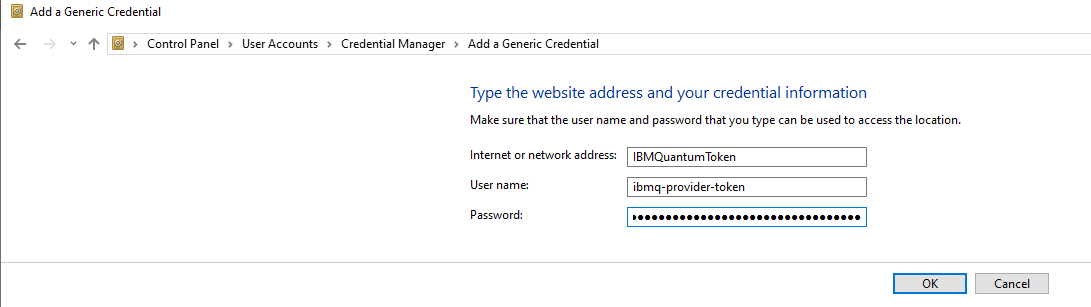

## 1.5 Get token and fetch Backends and their details:

In [6]:
# Fetch the already stored Token on OS (Windows Credential Manager) using Keyring
MY_SECRET_API_TOKEN = keyring.get_password("IBMQuantumToken", "ibmq-provider-token")

# 128 Character Token
print(len(MY_SECRET_API_TOKEN)) 

IBMQ.save_account(MY_SECRET_API_TOKEN,overwrite=True)

if IBMQ.active_account() is None:
    IBMQ.load_account()

# https://quantumcomputing.stackexchange.com/questions/16543/
# Print the list of backends
backend_list = [ backend.name() for backend in IBMQ.providers()[0].backends()]
# OR
x = IBMQ.providers()[0].backends()
print("list of names of backends:")
for backend in x:
    print(backend.name())



128
list of names of backends:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila
ibm_nairobi
ibm_oslo


In [7]:
# For each backend check the status: 
# https://quantumcomputing.stackexchange.com/questions/27082/how-to-get-the-backend-status-using-qiskit


#provider = IBMQ.get_provider(hub = 'ibm-q')
provider = IBMQ.providers()[0]

for i in backend_list:
    _backend = provider.get_backend(i)
    print("Status of \"",_backend.name(),"\" : ")
    print('  Operational: ', _backend.status().operational)
    print('  Pending jobs:', _backend.status().pending_jobs)
    print('  Status message:', _backend.status().status_msg)
    print()


Status of " ibmq_qasm_simulator " : 
  Operational:  True
  Pending jobs: 3
  Status message: active

Status of " ibmq_lima " : 
  Operational:  True
  Pending jobs: 537
  Status message: active

Status of " ibmq_belem " : 
  Operational:  True
  Pending jobs: 77
  Status message: active

Status of " ibmq_quito " : 
  Operational:  True
  Pending jobs: 99
  Status message: active

Status of " simulator_statevector " : 
  Operational:  True
  Pending jobs: 2
  Status message: active

Status of " simulator_mps " : 
  Operational:  True
  Pending jobs: 3
  Status message: active

Status of " simulator_extended_stabilizer " : 
  Operational:  True
  Pending jobs: 4
  Status message: active

Status of " simulator_stabilizer " : 
  Operational:  True
  Pending jobs: 4
  Status message: active

Status of " ibmq_manila " : 
  Operational:  True
  Pending jobs: 130
  Status message: active

Status of " ibm_nairobi " : 
  Operational:  True
  Pending jobs: 217
  Status message: active

Status of

## 1.6 Select a least loaded backend: 

In [8]:
real_qc_device  = IBMQ.providers()[0].get_backend('ibmq_belem') 

job = execute(qc,backend = real_qc_device,shots = 1024)



In [9]:
print(job.job_id())

632ab92c70890aa7992485c1


## 1.7 Check submitted job on portal: 

* Login to: https://quantum-computing.ibm.com/jobs
* Check: https://quantum-computing.ibm.com/jobs/JOB_ID

## 1.8 Fetch results: 

In [10]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)



Job Status: job has successfully run


In [18]:
device_result = job.result()


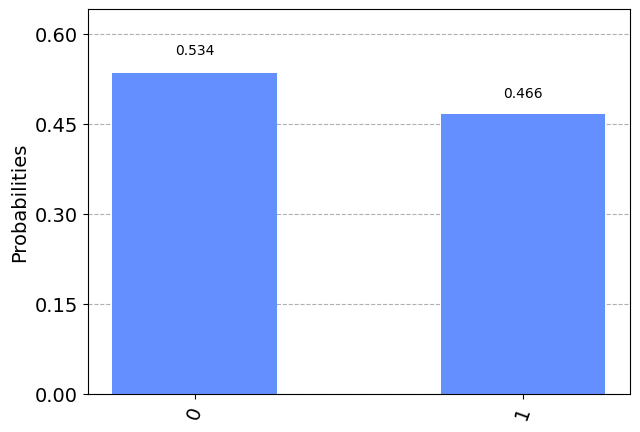

In [19]:
plot_histogram(device_result.get_counts())

In [20]:
print(device_result.get_counts())

{'0': 547, '1': 477}


```{'0': 529, '1': 471} --> Locally simulated
{'0': 547, '1': 477} --> Real QC backend at Belem```